In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Group 2
#SW550

#data= pd.read_excel('Autism_Data_Child_Version-2_Clean.csv')
dataFileName = 'Autism_Data_Child_Version-2 - Clean.csv';
data= pd.read_csv(dataFileName)
#data.rename(columns= {'austim':'autism'},inplace = True)
#data.head()

In [2]:
# Map Data to numeric values
data= data.fillna(method='ffill')
data['Sex']=data['Sex'].map({'m': 0, 'f': 1})
data['Ethnicity']=data['Ethnicity'].map({
    'aboriginal': 0,
    'asian': 1,
    'black': 2, 
    'hispanic': 3,
    'latino': 4,
    'middle eastern': 5,
    'south asians': 6,
    'white': 7,
    'others': 8
})
data['Ethnicity'].fillna(9, inplace = True)

data['Jaundice']=data['Jaundice'].map({'no': 0, 'yes': 1})
data['Family_ASD']=data['Family_ASD'].map({'no': 0, 'yes': 1})
data['Residence']=data['Residence'].map({
    'Afghanistan': 0,
    'Albania': 1,
    'Algeria': 2,
    'American Samoa': 3,
    'Angola': 4,
    'Argentina': 5,
    'Armenia': 6,
    'Australia': 7,
    'Austria': 8,
    'Bahamas': 9,
    'Bahrain': 10,
    'Bangladesh': 11,
    'Belgium': 12,
    'Belize': 13,
    'Bhutan': 14,
    'Bolivia': 15,
    'Brazil': 16,
    'British Indian Ocean Territory': 17,
    'Bulgaria': 18,
    'Canada': 19,
    'Chile': 20,
    'China': 21,
    'Costa Rica': 22,
    'Dominican Republic': 23,
    'Egypt': 24,
    'Europe': 25,
    'Finland': 26,
    'Georgia': 27,
    'Germany': 28,
    'Ghana': 29,
    'Hungary': 30,
    'India': 31,
    'Iran': 32,
    'Iraq': 33,
    'Ireland': 34,
    'Isle of Man': 35,
    'Italy': 36,
    'Jamaica': 37,
    'Japan': 38,
    'Jordan': 39,
    'Kuwait': 40,
    'Latvia': 41,
    'Lebanon': 42,
    'Libya': 43,
    'Malaysia': 44,
    'Malta': 45,
    'Mexico': 46,
    'Nepal': 47,
    'Netherlands': 48,
    'New Zealand': 49,
    'Nigeria': 50,
    'Oman': 51,
    'Pakistan': 52,
    'Peru': 53,
    'Philippines': 54,
    'Qatar': 55,
    'Romania': 56,
    'Russia': 57,
    'Saudi Arabia': 58,
    'South Africa': 59,
    'South Korea': 60,
    'Sri Lanka': 61,
    'Sudan': 62,
    'Sweden': 63,
    'Syria': 64,
    'Turkey': 65,
    'U.S. Outlying Islands': 66,
    'United Arab Emirates': 67,
    'United Kingdom': 68,
    'United States': 69,
    'Uzbekistan': 70,
    'Virgin Islands, British': 71
})
data['Used_App_Before']=data['Used_App_Before'].map({'no': 0, 'yes': 1})
data['Language']=data['Language'].map({
    'arabic': 0,
    'english': 1,
    'french': 2,
    'mandarin': 3,
    'portuguese': 4,
    'russian': 5,
    'spanish': 6,
    'swahili': 7,
    'turkish': 8,
    'urdu': 9
})
data['User']=data['User'].map({
    'friend': 0,
    'health care professional': 1,
    'parent': 2,
    'relative': 3,
    'self': 4,
    'teacher': 5
})
data['Class']=data['Class'].map({'NO': 0, 'YES': 1})


In [3]:
#data.head()
# Export cleaned data to CSV to compare
df = pd.DataFrame(data, columns= [
    'A1',
    'A2',
    'A3',
    'A4',
    'A5',
    'A6',
    'A7',
    'A8',
    'A9',
    'A10',
    'Age',
    'Sex',
    'Ethnicity',
    'Jaundice',
    'Family_ASD',
    'Residence',
    'Used_App_Before',
    'Language',
    'User',
    'Class'
])
df.to_csv(r'mappedData.csv', index = False, header = True)

In [4]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Language,User,Class
0,0,1,1,0,0,1,1,0,0,1,4,0,5.0,1,0,43,0,0,2,0
1,0,1,1,1,1,1,1,0,0,1,4,0,5.0,1,0,43,1,0,2,1
2,0,1,1,1,1,1,0,1,1,1,5,0,7.0,0,0,57,0,5,2,1
3,0,1,1,0,1,1,1,0,0,0,4,0,5.0,1,0,43,0,0,2,0
4,0,0,1,1,1,1,0,1,0,1,5,0,7.0,0,0,57,0,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,1,1,1,1,1,1,0,1,1,9,0,3.0,0,0,69,0,1,2,1
505,1,0,1,0,1,1,1,1,0,1,9,0,7.0,0,0,71,0,1,2,1
506,1,1,1,1,0,1,0,0,1,1,5,0,5.0,0,1,39,0,0,2,1
507,1,1,1,0,0,1,0,1,1,1,4,1,1.0,0,0,68,0,1,2,1


In [5]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test,y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [14]:
# Create model and fit data to it
model = Sequential()

# Input Layer
model.add(Dense(19, input_shape=(19,), activation = 'relu'))

# Hidden Layers
model.add(Dense(38, activation = 'relu'))
model.add(Dense(38, activation = 'relu'))

# Output Layer
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,epochs = 200, validation_data = (X_test, y_test), callbacks=[early_stop])

Train on 407 samples, validate on 102 samples
Epoch 1/200
407/407 [==============================] - 2s 4ms/sample - loss: 0.6588 - accuracy: 0.5528 - val_loss: 0.6133 - val_accuracy: 0.6176
Epoch 2/200
407/407 [==============================] - 0s 163us/sample - loss: 0.6075 - accuracy: 0.6609 - val_loss: 0.5601 - val_accuracy: 0.7059
Epoch 3/200
407/407 [==============================] - 0s 156us/sample - loss: 0.5559 - accuracy: 0.7248 - val_loss: 0.4999 - val_accuracy: 0.7843
Epoch 4/200
407/407 [==============================] - 0s 155us/sample - loss: 0.4902 - accuracy: 0.8305 - val_loss: 0.4312 - val_accuracy: 0.8431
Epoch 5/200
407/407 [==============================] - 0s 156us/sample - loss: 0.4192 - accuracy: 0.8722 - val_loss: 0.3609 - val_accuracy: 0.9118
Epoch 6/200
407/407 [==============================] - 0s 160us/sample - loss: 0.3491 - accuracy: 0.8722 - val_loss: 0.3018 - val_accuracy: 0.9020
Epoch 7/200
407/407 [==============================] - 0s 158us/sample - l

407/407 [==============================] - 0s 260us/sample - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0334 - val_accuracy: 0.9902
Epoch 57/200
407/407 [==============================] - 0s 251us/sample - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 0.9902
Epoch 58/200
407/407 [==============================] - 0s 244us/sample - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 0.9902
Epoch 59/200
407/407 [==============================] - 0s 229us/sample - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 0.9902
Epoch 60/200
407/407 [==============================] - 0s 242us/sample - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9902
Epoch 61/200
407/407 [==============================] - 0s 243us/sample - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.9902
Epoch 62/200
407/407 [==============================] - 0s 260us/sample - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0276 

407/407 [==============================] - 0s 227us/sample - loss: 8.9190e-04 - accuracy: 1.0000 - val_loss: 0.0223 - val_accuracy: 0.9902
Epoch 112/200
407/407 [==============================] - 0s 232us/sample - loss: 8.5023e-04 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 0.9902
Epoch 113/200
407/407 [==============================] - 0s 251us/sample - loss: 8.5308e-04 - accuracy: 1.0000 - val_loss: 0.0237 - val_accuracy: 0.9902
Epoch 114/200
407/407 [==============================] - 0s 261us/sample - loss: 8.0654e-04 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 0.9902
Epoch 115/200
407/407 [==============================] - 0s 246us/sample - loss: 8.2127e-04 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9902
Epoch 116/200
407/407 [==============================] - 0s 273us/sample - loss: 7.7908e-04 - accuracy: 1.0000 - val_loss: 0.0224 - val_accuracy: 0.9902
Epoch 117/200
407/407 [==============================] - 0s 231us/sample - loss: 7.7141e-04 - ac

407/407 [==============================] - 0s 248us/sample - loss: 3.2007e-04 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 0.9902
Epoch 165/200
407/407 [==============================] - 0s 246us/sample - loss: 3.0710e-04 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 0.9902
Epoch 166/200
407/407 [==============================] - 0s 238us/sample - loss: 3.0570e-04 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 0.9804
Epoch 167/200
407/407 [==============================] - 0s 224us/sample - loss: 2.9752e-04 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 0.9902
Epoch 00167: early stopping


In [16]:
model_history = pd.DataFrame(model.history.history)

In [17]:
model_history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.658812,0.552826,0.613332,0.617647
1,0.607452,0.660934,0.560091,0.705882
2,0.555916,0.724816,0.499886,0.784314
3,0.490180,0.830467,0.431154,0.843137
4,0.419153,0.872236,0.360944,0.911765


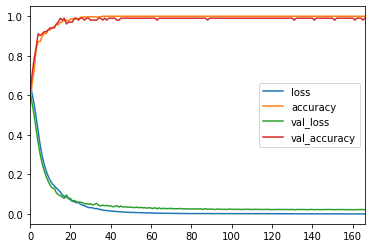

In [18]:
## THIS IS PERFECT 
model_history.plot()

In [19]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

102/102 [==============================] - 0s 164us/sample - loss: 0.0225 - accuracy: 0.9902
0.02248360982333657 0.99019605


In [20]:
from tensorflow.keras.models import load_model

In [21]:
model.save('autism_screener')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: autism_screener\assets


In [22]:
new_model = load_model('autism_screener')

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
predictions = new_model.predict_classes(X_test)

In [25]:
predictions[:10]

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [26]:
print(confusion_matrix(y_test, predictions))

[[47  1]
 [ 0 54]]


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        54

    accuracy                           0.99       102
   macro avg       0.99      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



In [28]:
from sklearn import metrics

In [29]:
print(metrics.accuracy_score(y_test, predictions))

0.9901960784313726
